# Setup

~~Create environment~~\
~~open file and create dataframe~~\
~~remove outliers using turkey outliers~~

# Figures and Table to Replicate

Figure 1\
Figure 2\
~~Figure 3~~\
Table 2\
Table 3\
~~Table 4~~\
Table 5\
Table 6\
Table 7

In [3]:
import pandas as pd
import math
import numpy as np
import matplotlib.pylab as plt
from scipy.stats import spearmanr

In [4]:
# Reading input file and creating dataframe for analysis

df = pd.read_csv("/Users/admin/Desktop/SENG-480B-Final-Project-1/Input files/prlist.txt", sep=",")   
df["sloc"]=df['Insertions']+df['Deletions']+df['Modifications']
df.head()

,Language,Project,PR ID,Created At,Merged At,Merge time minutes,Files changed,Insertions,Deletions,Modifications,sloc
0,CPlusPlus,tensorflow-tensorflow,337,2015-11-23 22:03:56Z,2015-12-23 19:20:24Z,43036,1,5,0,0,5
1,CPlusPlus,tensorflow-tensorflow,538,2015-12-18 01:00:02Z,2015-12-18 01:21:56Z,21,1,0,3,2,5
2,CPlusPlus,tensorflow-tensorflow,541,2015-12-18 02:30:09Z,2016-01-11 17:43:05Z,35472,3,150,0,0,150
3,CPlusPlus,tensorflow-tensorflow,544,2015-12-18 06:00:47Z,2015-12-21 17:49:47Z,5029,1,2,0,10,12
4,CPlusPlus,tensorflow-tensorflow,546,2015-12-18 10:20:02Z,2015-12-21 18:19:41Z,4799,6,7,12,77,96


In [5]:
# Using turkey outlier to drop outliers in the data. This is the same method as the original study for continuity

def turkey_outlier(df, column, whisker_width=1.5):
    # Calculate Q1, Q2 and IQR
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    # Apply filter with respect to IQR, including optional whiskers
    filter = (df[column] >= q1 - whisker_width*iqr) & (df[column] <= q3 + whisker_width*iqr)
    return df.loc[filter]                                                     

# Example for whiskers = 1.5, as requested by the OP
table3=df.copy()
display(df)
display(df.describe())
df = turkey_outlier(df, 'Merge time minutes', whisker_width=1.5)
df = turkey_outlier(df, 'sloc', whisker_width=1.5)
display(df)
df.describe()

,Language,Project,PR ID,Created At,Merged At,Merge time minutes,Files changed,Insertions,Deletions,Modifications,sloc
0,CPlusPlus,tensorflow-tensorflow,337,2015-11-23 22:03:56Z,2015-12-23 19:20:24Z,43036,1,5,0,0,5
1,CPlusPlus,tensorflow-tensorflow,538,2015-12-18 01:00:02Z,2015-12-18 01:21:56Z,21,1,0,3,2,5
2,CPlusPlus,tensorflow-tensorflow,541,2015-12-18 02:30:09Z,2016-01-11 17:43:05Z,35472,3,150,0,0,150
3,CPlusPlus,tensorflow-tensorflow,544,2015-12-18 06:00:47Z,2015-12-21 17:49:47Z,5029,1,2,0,10,12
4,CPlusPlus,tensorflow-tensorflow,546,2015-12-18 10:20:02Z,2015-12-21 18:19:41Z,4799,6,7,12,77,96
...,...,...,...,...,...,...,...,...,...,...,...
845311,Ruby,rapid7-metasploit-framework,14840,2021-03-02 11:01:02Z,2021-03-02 11:27:21Z,26,1,0,1,0,1
845312,Ruby,rapid7-metasploit-framework,14843,2021-03-02 12:42:34Z,2021-03-03 22:58:29Z,2055,2,15,10,0,25
845313,Ruby,rapid7-metasploit-framework,14847,2021-03-03 02:51:53Z,2021-03-05 10:02:44Z,3310,2,402,0,0,402
845314,Ruby,rapid7-metasploit-framework,14853,2021-03-04 10:47:27Z,2021-03-04 17:17:58Z,390,26,0,0,55,55


,PR ID,Merge time minutes,Files changed,Insertions,Deletions,Modifications,sloc
count,845316.000000,8.453160e+05,845316.000000,8.453160e+05,8.453160e+05,8.453160e+05,8.453160e+05
mean,18415.315781,1.073638e+04,10.261115,3.376669e+02,1.791902e+02,1.188366e+02,6.356937e+02
std,18010.686704,5.114355e+04,124.297058,1.222192e+04,1.041329e+04,3.446907e+03,1.778126e+04
min,1.000000,-8.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5714.000000,1.240000e+02,1.000000,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00
50%,12641.000000,9.690000e+02,2.000000,8.000000e+00,0.000000e+00,3.000000e+00,2.200000e+01
75%,24900.000000,4.656000e+03,5.000000,5.400000e+01,5.000000e+00,1.500000e+01,1.000000e+02
max,118261.000000,4.279916e+06,27915.000000,4.150354e+06,4.144941e+06,1.333273e+06,4.150524e+06


,Language,Project,PR ID,Created At,Merged At,Merge time minutes,Files changed,Insertions,Deletions,Modifications,sloc
1,CPlusPlus,tensorflow-tensorflow,538,2015-12-18 01:00:02Z,2015-12-18 01:21:56Z,21,1,0,3,2,5
3,CPlusPlus,tensorflow-tensorflow,544,2015-12-18 06:00:47Z,2015-12-21 17:49:47Z,5029,1,2,0,10,12
4,CPlusPlus,tensorflow-tensorflow,546,2015-12-18 10:20:02Z,2015-12-21 18:19:41Z,4799,6,7,12,77,96
5,CPlusPlus,tensorflow-tensorflow,555,2015-12-19 06:30:34Z,2015-12-19 07:03:38Z,33,2,0,0,2,2
7,CPlusPlus,tensorflow-tensorflow,568,2015-12-20 10:50:30Z,2015-12-20 17:38:25Z,407,1,0,0,4,4
...,...,...,...,...,...,...,...,...,...,...,...
845310,Ruby,rapid7-metasploit-framework,14838,2021-03-02 02:07:40Z,2021-03-02 16:23:18Z,855,1,0,0,1,1
845311,Ruby,rapid7-metasploit-framework,14840,2021-03-02 11:01:02Z,2021-03-02 11:27:21Z,26,1,0,1,0,1
845312,Ruby,rapid7-metasploit-framework,14843,2021-03-02 12:42:34Z,2021-03-03 22:58:29Z,2055,2,15,10,0,25
845314,Ruby,rapid7-metasploit-framework,14853,2021-03-04 10:47:27Z,2021-03-04 17:17:58Z,390,26,0,0,55,55


,PR ID,Merge time minutes,Files changed,Insertions,Deletions,Modifications,sloc
count,624696.000000,624696.000000,624696.000000,624696.000000,624696.000000,624696.000000,624696.000000
mean,17885.692258,1609.449559,3.142051,18.646988,4.612123,8.596149,31.855261
std,17615.636950,2432.431551,15.647912,32.550732,14.828756,17.501365,43.674701
min,1.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5578.000000,87.000000,1.000000,0.000000,0.000000,1.000000,3.000000
50%,12324.000000,485.000000,2.000000,4.000000,0.000000,2.000000,12.000000
75%,23973.000000,1830.000000,3.000000,21.000000,2.000000,8.000000,42.000000
max,118261.000000,11454.000000,8440.000000,201.000000,201.000000,201.000000,201.000000


In [6]:
# Table 2: Distribution of outliers excluded based on SLOC. Random sample of N = 100.



In [7]:
# Table 3: Time-to-merge (hours) and SLOC per pull request before and after removing the outliers using Tukey 1.5×𝐼𝑄𝑅 fence. N = total number, M = mean, Mdn = median, SD = standard deviation.
#before filtering dataset
day=table3["Merge time minutes"]/60
day=pd.to_numeric(day, downcast='integer').apply(np.ceil)
pull=pd.DataFrame()
pull= table3.copy()
pull["Merge time minutes"]=day
pull=pull.drop(columns=["PR ID","Modifications", "Files changed","Insertions","Deletions"])
before=pull.agg({ 'Merge time minutes': ['count','mean','median', 'std'], 'sloc': ['mean','median', 'std']}).rename(columns={"Merge time minutes":"Merge time hours","count":"N"})

#filter outliers
table3 = turkey_outlier(table3, 'Merge time minutes', whisker_width=1.25)
table3 = turkey_outlier(table3, 'sloc', whisker_width=1.25)

#after filtering dataset
day=df["Merge time minutes"]/60
day=pd.to_numeric(day, downcast='integer').apply(np.ceil)
pull=pd.DataFrame()
pull= table3.copy()
pull["Merge time minutes"]=day
pull=pull.drop(columns=["PR ID","Modifications", "Files changed","Insertions","Deletions"])
after=pull.agg({ 'Merge time minutes': ['count','mean','median', 'std'], 'sloc': ['mean','median', 'std']}).rename(columns={"Merge time minutes":"Merge time hours","count":"N"})

#combining the before and after metrics
combine=pd.concat([before,after], axis=1)
df1 = pd.concat([before], keys=["before"], names=['type'],axis=1)
df2 = pd.concat([after], keys=["after"], names=['type'],axis=1)
combine=pd.concat([df1,df2], axis=1)

In [10]:
# Table 4 Time-to-merge (hours) and SLOC per pull request
# N = total number, M = mean, Mdn = median, SD = standard deviation.


day=df["Merge time minutes"]/60
day=pd.to_numeric(day, downcast='integer').apply(np.ceil)
pull=pd.DataFrame()
pull= df.copy()
pull["Merge time minutes"]=day
pull=pull.drop(columns=["PR ID","Modifications", "Files changed","Insertions","Deletions"])
pull=pull.groupby(["Language"]).agg({ 'Merge time minutes': ['count','mean','median', 'std'], 'sloc': ['mean','median', 'std']}).rename(columns={"Merge time minutes":"Merge time hours","count":"count"})
display(pull)

Merge time hours                                    sloc         \
                      count       mean median        std       mean median   
Language                                                                     
C                     35063  25.257280    8.0  38.354588  31.139092   11.0   
CPlusPlus            103516  29.339735   11.0  41.542143  30.748638   12.0   
CSharp                56069  31.766038   15.0  42.296980  37.638624   16.0   
Java                  44404  27.497748    7.0  41.846797  41.459531   19.0   
JavaScript            57977  23.002553    6.0  36.737978  28.699070   10.0   
Php                   65965  27.598696    9.0  40.764371  27.128083    9.0   
Python               102489  30.200422   12.0  42.008823  31.266487   12.0   
Ruby                  65882  23.111912    6.0  37.691758  25.511581    9.0   
Shell                 11524  23.661489    6.0  38.673973  21.318900    5.0   
TypeScript            81807  25.711773    6.0  40.361397  37.764800   16.0   

                       
                  std  
Language               
C           43.339598  
CPlusPlus   42.375277  
CSharp      47.674949  
Java        49.795862  
JavaScript  41.434088  
Php         39.557609  
Python      42.668001  
Ruby        38.679871  
Shell       36.567111  
TypeScript  47.427707

In [ ]:
# Table 5: Spearman correlation coefficient 𝑟𝑠 (𝑝 < .001) between time-to-merge (hours) and total SLOC. N = total number.

temp = df.copy()
temp = temp[['Language', 'Merge time minutes', 'sloc']]
temp['Merge time minutes'] = temp['Merge time minutes']/60
# ttm.rename(columns = {"Merge time minutes": "Merge time hours"})

temp = temp.groupby(["Language"]).agg(N = ('Language','count'), sumMTM = ('Merge time minutes', 'sum'), sumSLOC = ('sloc', 'sum'))
#.corr(method='spearman').unstack()



#temp = temp.groupby(["Language"]).agg({"Merge time minutes": ['sum'], "sloc": ['sum']}).corr(method='spearman')
#print(temp)

#temp = temp[['Merge time minutes', 'sloc']]
#print(temp)

#print(temp.corr(method='spearman'))



#t5 = temp.groupby('Language')[['Merge time minutes', 'sloc']].corr(method='spearman').unstack()
#print(t5)


#sloc = df[['Language', 'sloc']]


# #coef, p = spearmanr(ttm, sloc)
#print('Spearmans correlation coefficient: %.3f' % coef)

#alpha = 0.001
#if p<alpha:
   # print("good")

t5 = pd.DataFrame()
t5 = df.copy()
t5 = t5.groupby('Language')[['Merge time minutes', 'sloc']].corr(method='spearman').unstack().iloc[:,1]

#t5 = t5.groupby(["Language"]).agg({"Language":['count'], ['Merge time minutes']:})
#t5 = t5.to_frame()
t5 = t5.rename(columns={'':'rs'}, inplace=True)
print(t5)
#list(t5.columns)


TypeError: rename() got an unexpected keyword argument 'columns'

In [ ]:
# Table 6: Spearman correlation coefficient 𝑟𝑠 (𝑝 < .001) between time-to-merge in hours and total SLOC in a pull request by pull request creation day. N = total number
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
t6=df.copy()
t6['create_date'] = pd.to_datetime(t6['Created At']).dt.date
t6['create_date'] = pd.to_datetime(t6['create_date'])
t6['day-of-week'] = t6['create_date'].dt.dayofweek
t6.sort_values(['day-of-week'],ascending=True)
t6['day-of-week']=t6['day-of-week'].map(dayOfWeek)

cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
groups = t6.groupby(["day-of-week"]).agg({ 'Merge time minutes':['count']})
display(groups)

,Language,Project,PR ID,Created At,Merged At,Merge time minutes,Files changed,Insertions,Deletions,Modifications,sloc,create_date,day-of-week
1,CPlusPlus,tensorflow-tensorflow,538,2015-12-18 01:00:02Z,2015-12-18 01:21:56Z,21,1,0,3,2,5,2015-12-18,Friday
3,CPlusPlus,tensorflow-tensorflow,544,2015-12-18 06:00:47Z,2015-12-21 17:49:47Z,5029,1,2,0,10,12,2015-12-18,Friday
4,CPlusPlus,tensorflow-tensorflow,546,2015-12-18 10:20:02Z,2015-12-21 18:19:41Z,4799,6,7,12,77,96,2015-12-18,Friday
5,CPlusPlus,tensorflow-tensorflow,555,2015-12-19 06:30:34Z,2015-12-19 07:03:38Z,33,2,0,0,2,2,2015-12-19,Saturday
7,CPlusPlus,tensorflow-tensorflow,568,2015-12-20 10:50:30Z,2015-12-20 17:38:25Z,407,1,0,0,4,4,2015-12-20,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
845310,Ruby,rapid7-metasploit-framework,14838,2021-03-02 02:07:40Z,2021-03-02 16:23:18Z,855,1,0,0,1,1,2021-03-02,Tuesday
845311,Ruby,rapid7-metasploit-framework,14840,2021-03-02 11:01:02Z,2021-03-02 11:27:21Z,26,1,0,1,0,1,2021-03-02,Tuesday
845312,Ruby,rapid7-metasploit-framework,14843,2021-03-02 12:42:34Z,2021-03-03 22:58:29Z,2055,2,15,10,0,25,2021-03-02,Tuesday
845314,Ruby,rapid7-metasploit-framework,14853,2021-03-04 10:47:27Z,2021-03-04 17:17:58Z,390,26,0,0,55,55,2021-03-04,Thursday


,Merge time minutes
,count
day-of-week,
Friday,98067
Monday,101470
Saturday,48743
Sunday,45439
Thursday,108793
Tuesday,110905
Wednesday,111279


Text(0, 0.5, '% of total pull requests')

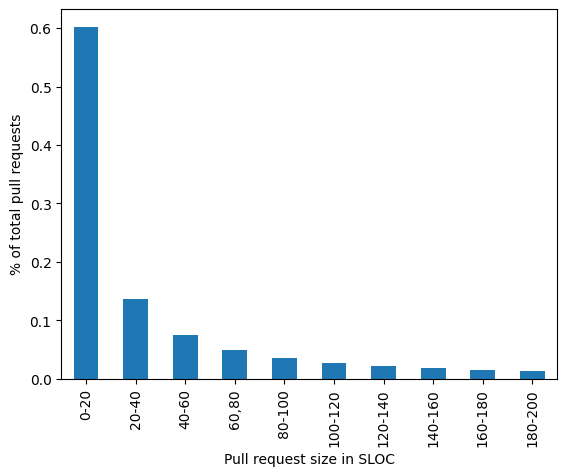

In [ ]:
# Figure 1: A barplot of pull request sizes
bins = [0, 20, 40, 60, 80,100,120,140,160,180,200]
fig1 = df.copy()
fig1['Pull request size in SLOC'] = pd.cut(fig1['sloc'], [0, 20, 40, 60, 80,100,120,140,160,180,200], labels=['0-20',"20-40", '40-60',"60,80","80-100",'100-120' ,'120-140', "140-160", '160-180',"180-200"])
groups = fig1.groupby(["Pull request size in SLOC"]).size()/total
ax=groups.plot.bar()
ax.set_ylabel("% of total pull requests")

Text(0, 0.5, '% of total pull requests')

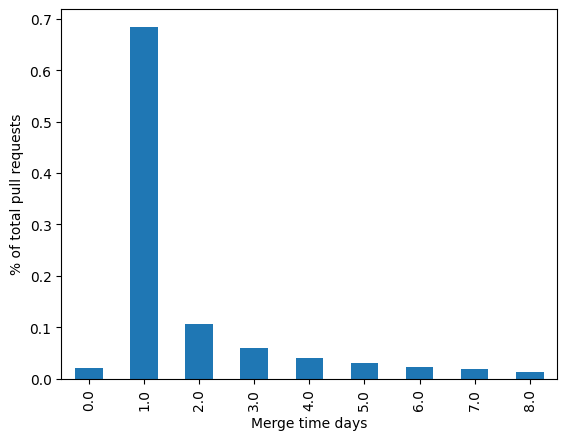

In [ ]:
#Figure 2: A barplot of time-to-merge for pull requests.
fig2 = df.copy()
day=fig2["Merge time minutes"]/1440
day=pd.to_numeric(day, downcast='integer').apply(np.ceil)
fig2["Merge time days"]=day
total=len(fig2)
fig2.groupby(["Merge time days"])
groups = fig2.groupby(["Merge time days"]).size()/total
ax=groups.plot.bar()
ax.set_ylabel("% of total pull requests")

Text(0, 0.5, 'Merge time in hours')

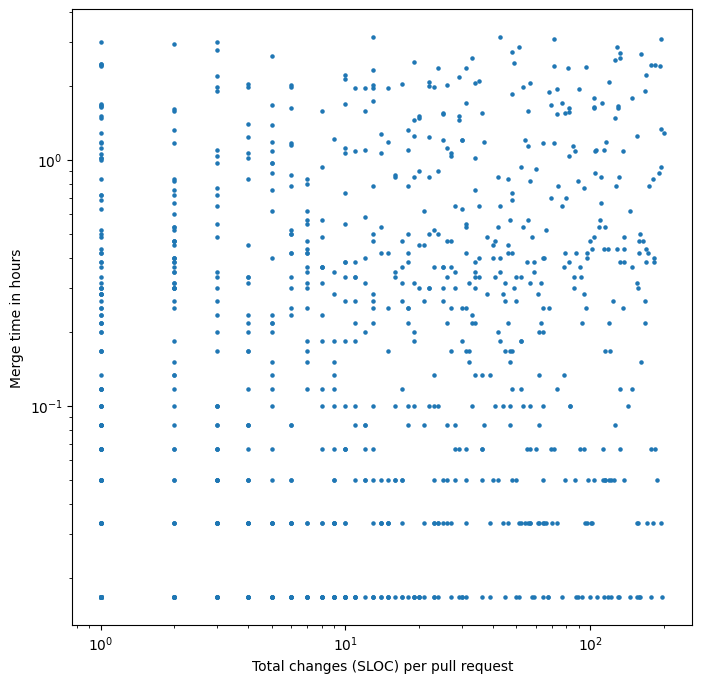

In [ ]:
# Figure 3
# A scatter plot of pull request sizes and time-to-merge. Random sample of 𝑁 = 1,000 pull requests.
sloc=df.sample(n=1000,random_state=3)
day=sloc["Merge time minutes"]/60
day=pd.to_numeric(day, downcast='integer').apply(np.ceil)
sloc["Merge time minutes"]=day

plt.figure(figsize=(8,8))
plt.axes(xscale='log', yscale='log')
plt.scatter(sloc['sloc'], sloc["Merge time minutes"]/60,s=5)
plt.xlabel('Total changes (SLOC) per pull request')
plt.ylabel('Merge time in hours')